<a href="https://colab.research.google.com/github/Ananya9304/Gold_Price_Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [29]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [30]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [31]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [32]:
gold_data.shape

(2290, 6)

In [33]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [34]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [35]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [36]:
# Assuming 'Date' is the column containing date strings
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Convert 'Date' column to datetime objects

# Option 1: Exclude 'Date' column from correlation calculation
correlation = gold_data.drop(columns=['Date']).corr()

# Option 2: Extract numerical features from the 'Date' column
# For example, to get the year:
gold_data['Year'] = gold_data['Date'].dt.year
correlation = gold_data.corr() # Now includes correlation with 'Year'

<Axes: >

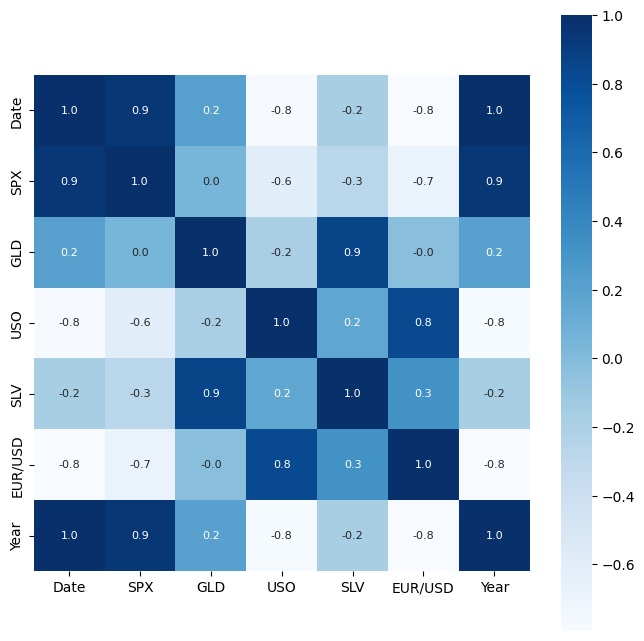

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True,annot_kws={'size':8}, cmap='Blues')

In [38]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Name: GLD, dtype: float64


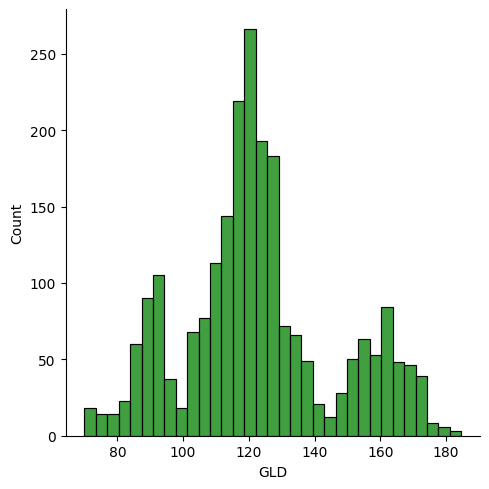

In [39]:
sns.displot(gold_data['GLD'],color='green')

In [40]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [41]:
print(X)

              SPX        USO      SLV   EUR/USD  Year
0     1447.160034  78.470001  15.1800  1.471692  2008
1     1447.160034  78.370003  15.2850  1.474491  2008
2     1411.630005  77.309998  15.1670  1.475492  2008
3     1416.180054  75.500000  15.0530  1.468299  2008
4     1390.189941  76.059998  15.5900  1.557099  2008
...           ...        ...      ...       ...   ...
2285  2671.919922  14.060000  15.5100  1.186789  2018
2286  2697.790039  14.370000  15.5300  1.184722  2018
2287  2723.070068  14.410000  15.7400  1.191753  2018
2288  2730.129883  14.380000  15.5600  1.193118  2018
2289  2725.780029  14.405800  15.4542  1.182033  2018

[2290 rows x 5 columns]


In [42]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
regressor.fit(X_train,Y_train)
print(regressor)

RandomForestRegressor()


In [22]:
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[168.64969975  82.18599992 115.97829998 127.66010089 120.24410166
 154.86789792 150.14749787 125.91510035 117.56099837 126.08250073
 116.24220084 172.14770092 141.55369981 167.77209804 115.38919991
 117.36960055 138.91340288 170.33520115 159.5493026  158.82609947
 155.04380041 123.53830001 175.33809948 157.43600269 125.25870038
  93.75519983  76.57950015 120.33639976 119.15630006 167.41649995
  88.10960017 125.42660049  91.16510033 117.65180006 120.98359976
 136.13580037 115.69200122 114.60710065 146.13010012 107.32600073
 105.67790268  87.10809762 126.51890059 117.80100004 155.32159869
 119.91929949 108.37329971 108.04469866  93.11460051 127.16139769
  75.72250016 113.416699   120.32409982 111.19019941 118.94939917
 120.1855993  158.88310125 168.95190129 147.08079665  86.08969872
  94.17260026  87.06979844  90.30400023 118.92940062 126.33670057
 127.73130006 170.45750034 122.26719924 118.04569876  98.17569992
 168.25760167 143.19919806 132.6568025  120.52290102 123.60509891
 119.62630

In [24]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9902502941096567


In [25]:
Y_test = list(Y_test)

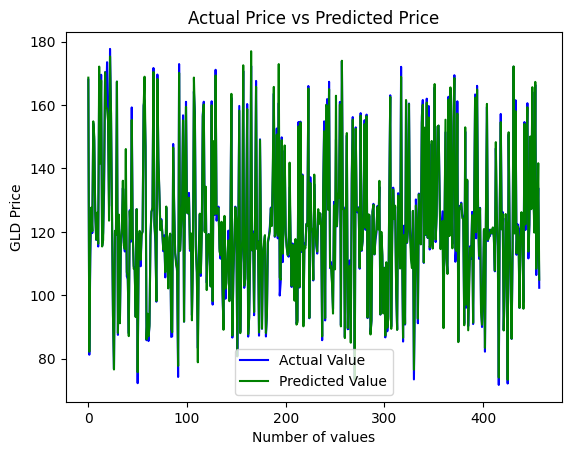

In [27]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()